## Follow up with Azure OpenAI the course ChatGPT Prompt Engineering for Developers

### Iterative

This notebook is based on the course: [chatgpt prompt eng: Iterative](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/3/iterative)

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('AZURE_OPENAI_KEY')
openai.api_type = "azure"
openai.api_version = "2023-08-01-preview"
openai.api_base = "https://cog-moww6huavlklg.openai.azure.com/"


In [2]:
def get_completion(prompt, model="gpt-3.5-turbo",deployment="chat"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        engine=deployment,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

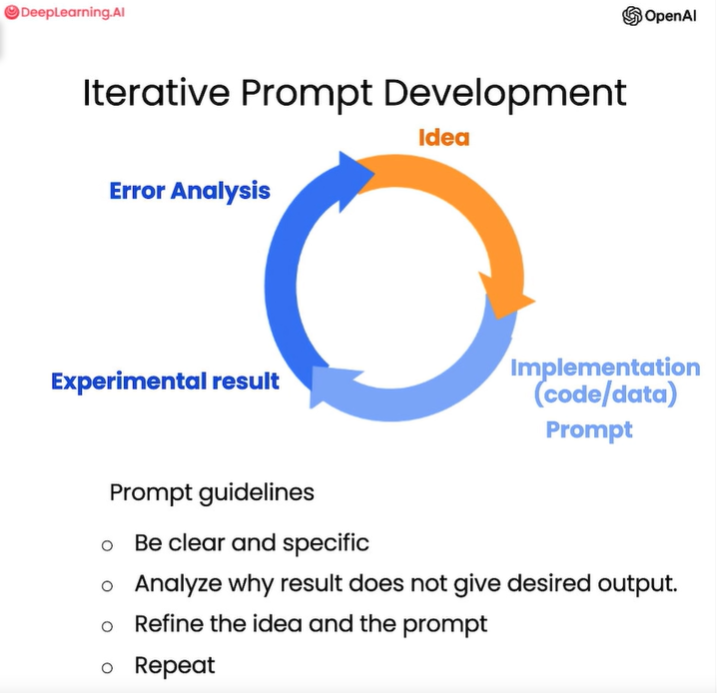

## Generate a marketing product description from a product fact sheet

In [3]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [4]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. Part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, this chair is available in several options of shell color and base finishes to suit your style. Choose from plastic back and front upholstery (SWC-100) or full upholstery (SWC-110) in 10 fabric and 6 leather options.

The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. It is available with or without armrests and is qualified for contract use. The base finish options are stainless steel, matte black, gloss white, or chrome.

Measuring at a width of 53 cm, depth of 51 cm, and height of 80 cm, with a seat height of 44 cm and seat depth of 41 cm, this chair is designed for ultimate comfort. You can also choose between soft or hard-floor caster options and two choices of seat fo

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [5]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

- Use at most 50 words.
- Provide the answer in Spanish.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Silla de oficina inspirada en el diseño de mediados de siglo, con opciones de color y acabado de base. Disponible con tapicería de plástico o completa en 10 opciones de tela y 6 de cuero. Ajuste neumático de altura y opción de reposabrazos. Adecuada para hogar o negocio. Fabricada en Italia.


In [6]:
len(response.split())

51

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [7]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

- Use at most 50 words.
- Provide the answer in Spanish.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Esta silla de oficina de inspiración de mediados de siglo es perfecta para hogares o negocios. Con opciones de color de carcasa y acabados de base, está disponible con tapicería completa o de plástico en 10 opciones de tela y 6 opciones de cuero. La base de aluminio recubierta de plástico tiene 5 ruedas y un ajuste neumático para subir y bajar fácilmente. Fabricada en Italia con una carcasa de aluminio fundido y un revestimiento de nylon modificado PA6/PA66.


In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from and the
description must show bullets to remark technical 
specifications.

- Use at most 50 words.
- Provide the answer in Spanish.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Silla de oficina de inspiración mid-century con varias opciones de color y acabado de base. Disponible con tapicería de plástico o completa en 10 opciones de tela y 6 de cuero. Base de acero inoxidable, negro mate, blanco brillante o cromo. Ajuste neumático de altura del asiento. Fabricada en Italia con aluminio fundido y nylon modificado.


In [13]:
prompt = f"""
Tu tarea es ayudar al equipo de marketing a crear
una descripción para el sitio web del distribuidor
del producto basándote en la ficha técnica.

La descripción es para distribuidores de muebles, por tanto
esta debe ser técnica y enfocada en los materiales del producto.

Escribe la descripción del producto basándote en la
ficha técnica delimitada por los tres acentos graves. 

La descripción debe ser en español y seguir el siguiente formato:

Descripción del producto cuando mucho en 10 palabras.
- Característica 1
- Característica 2
...
- Característica n

Especifaciones técnicas: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Silla de oficina con diseño mid-century
- Varios colores de carcasa y acabados de base.
- Tapizado en tela o cuero en múltiples opciones.
- Base de aluminio con ruedas y ajuste neumático.
- Disponible con o sin reposabrazos.
- Apta para uso en hogar o negocio.
- Fabricada en Italia.


In [14]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words and provide answer in Spanish

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Esta silla de oficina de inspiración mid-century es parte de una hermosa familia de muebles que incluye archivadores, escritorios, estanterías, mesas de reuniones y más. Disponible en varios colores de carcasa y acabados de base, con opciones de tapicería completa o parcial. La base de aluminio recubierta de plástico tiene 5 ruedas y ajuste neumático para subir y bajar fácilmente. Disponible con o sin reposabrazos y con opciones de ruedas para suelos duros o blandos. Fabricada en Italia con materiales de alta calidad. ID de producto: SWC-100, SWC-110.


## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [15]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Your answer must be in Spanish.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<h2>Silla de Oficina Mid-Century</h2>
<p>La Silla de Oficina Mid-Century es parte de una hermosa familia de muebles de oficina inspirados en el estilo de mediados de siglo, que incluye archivadores, escritorios, estanterías, mesas de reuniones y más. Esta silla está disponible en varios colores de carcasa y acabados de base, lo que la hace perfecta para cualquier entorno de hogar o negocio. La silla está disponible con tapicería de plástico en la parte delantera y trasera (SWC-100) o con tapicería completa (SWC-110) en 10 opciones de tela y 6 opciones de cuero. Las opciones de acabado de la base son: acero inoxidable, negro mate, blanco brillante o cromo. La silla está disponible con o sin reposabrazos y es apta para uso contractual.</p>
<h3>Materiales</h3>
<ul>
<li>Carcasa: Aluminio fundido con recubrimiento de nylon modificado PA6/PA66. Espesor de la carcasa: 10 mm.</li>
<li>Asiento: Espuma HD36</li>
<li>Base: Aluminio recubierto de plástico con 5 ruedas.</li>
</ul>
<h3>Opcione

## Load Python libraries to view HTML

In [16]:
from IPython.display import display, HTML

In [17]:
display(HTML(response))

Dimensión,Medida
Ancho,"53 cm | 20,87"""
Profundidad,"51 cm | 20,08"""
Altura,"80 cm | 31,50"""
Altura del asiento,"44 cm | 17,32"""
Profundidad del asiento,"41 cm | 16,14"""


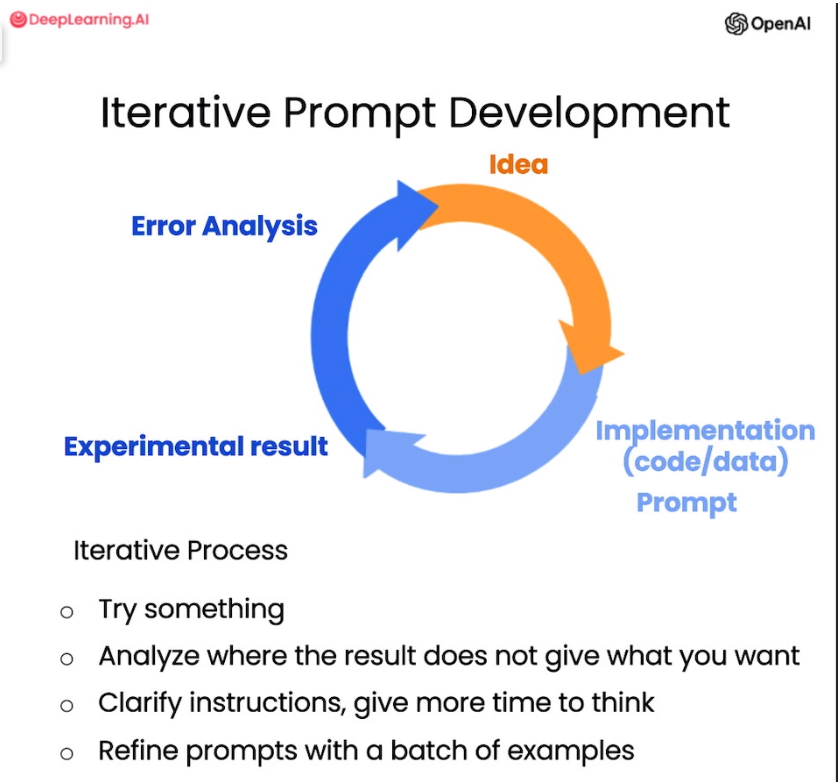